## Corona progression in The Netherlands

In [15]:
import csv
import pandas as pd
import re

DATE = "Date_of_report"
DEAD = "Deceased"
HOSPITALIZED = "Hospital_admission"
INFILENAME = "corona-nl-totals.csv"
INFECTED = "Total_reported"
URL = "https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_cumulatief.csv"

def summarizeDate(date):
    return(re.sub(r"-","",date.split()[0]))

def readData():
    try:
        df = pd.read_csv(URL,sep=";")
        dfGroups = df.groupby(DATE)
        lastDead,lastHospitalized,lastInfected = 0,0,0
        data = {}
        for date,group in dfGroups:
            date = summarizeDate(date)
            dead = sum(group[DEAD])
            hospitalized = sum(group[HOSPITALIZED])
            infected = sum(group[INFECTED])
            data[date] = {INFECTED:infected-lastInfected,HOSPITALIZED:hospitalized-lastHospitalized,DEAD:dead-lastDead}
            lastDead,lastHospitalized,lastInfected = dead,hospitalized,infected
        pd.DataFrame.from_dict(data).to_csv(INFILENAME)
        print(f"stored data in file {INFILENAME}")
    except: 
        data = pd.read_csv(INFILENAME,index_col=0).T.to_dict()
        print(f"read data from file {INFILENAME}")
    return(data)
    
data = readData()
print(f"updated until {list(data.keys())[-1]} ({list(data.values())[-1][INFECTED]})")

stored data in file corona-nl-totals.csv
updated until 20200922 (2245)


In [16]:
def combine(listIn,maxCount):
    listOut = []
    for i in range(0,len(listIn)):
        total = 0
        count = 0
        for j in range(i,i-maxCount,-1): 
            if j >= 0:
                total += listIn[j]
                count += 1
        listOut.append(total/count)
    return(listOut)

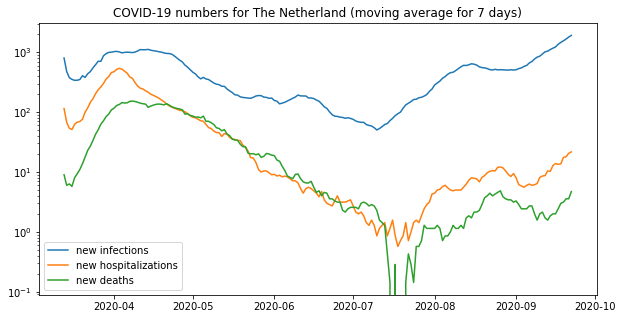

In [19]:
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

DATEPATTERN = "%Y%m%d"
PLOTFILENAME = "corona-nl.png"
WEEKLENGTH = 7
MAXDATE = "99999999"

def visualize(data,useLogScale=False):
    x = [datetime.datetime.strptime(str(date),DATEPATTERN) for date in data if date < MAXDATE]
    infected = combine([data[date][INFECTED] for date in data if date < MAXDATE],WEEKLENGTH)
    hospitalized = combine([data[date][HOSPITALIZED] for date in data if date < MAXDATE],WEEKLENGTH)
    dead = combine([data[date][DEAD] for date in data if date < MAXDATE],WEEKLENGTH)

    plt.figure(figsize=(10,5))
    if useLogScale: plt.yscale("log")
    plt.plot_date(x,infected,fmt="-",label="new infections")
    plt.plot_date(x,hospitalized,fmt="-",label="new hospitalizations")
    plt.plot_date(x,dead,fmt="-",label="new deaths")
    plt.legend()
    plt.savefig(PLOTFILENAME)
    plt.title("COVID-19 numbers for The Netherland (moving average for 7 days)")
    plt.show()
    
visualize(data,useLogScale=True)